# Sentimental Analysis of Henry Harvin with Youtube Comments

We have Extracted comments by using Scrapper from the Youtube Comments of different videos uploaded by "Henry Harvin Education"

The datas has been saved as excel file

In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Excel Sheet with comments

In [4]:
ds = pd.read_excel("Final data.xlsx")

In [5]:
ds.shape

(167, 2)

In [6]:
ds.head(15)

,Username,Comment
0,SUNITA YADAV,I've heard great reviews about Henry Harvin's ...
1,khalid kamal,"The instructors are the best, they helped me s..."
2,Shivank Sharmaji,"Timing of the video recommendation is perfect,..."
3,Surabhi Bharati,This review was really informative. It cleared...
4,Mushir Khan,Geart.... This is very detailed review on Henr...
5,iqra jilani,"Thanku for this information, course is really ..."
6,Kim Kapoor,Really helpful program 👍and m glad that I did ...
7,jatin khatri,Really helpful program 👍and m glad that I did ...
8,Harshita Sharma,This is a very helpful six sigma course review...
9,Deepak verma,Amazing Course and well disigned curriculum


In [7]:
ds.isnull().sum()

Username    0
Comment     3
dtype: int64

In [8]:
# Dropping 3 rows with missing comments

In [9]:
ds = ds[['Comment']]
ds.dropna(inplace=True)

In [10]:
ds.isnull().sum()

Comment    0
dtype: int64

In [11]:
ds.head(15)

,Comment
0,I've heard great reviews about Henry Harvin's ...
1,"The instructors are the best, they helped me s..."
2,"Timing of the video recommendation is perfect,..."
3,This review was really informative. It cleared...
4,Geart.... This is very detailed review on Henr...
5,"Thanku for this information, course is really ..."
6,Really helpful program 👍and m glad that I did ...
7,Really helpful program 👍and m glad that I did ...
8,This is a very helpful six sigma course review...
9,Amazing Course and well disigned curriculum


In [12]:
ds['Comment'].iloc[2]

'Timing of the video recommendation is perfect, shared with a friend who was planning to do lean six sigma certification.'

In [13]:
# Importing Regular Expressions to replace Punctuations and Special Characters

In [14]:
import re 

In [15]:
#result = re.sub('abc',  '',    input)           # Delete pattern abc
#result = re.sub('abc',  'def', input)           # Replace pattern abc -> def
#result = re.sub(r'\s+', ' ',   input)           # Eliminate duplicate whitespaces using wildcards
#result = re.sub('abc(def)ghi', r'\1', input)    # Replace a string with a part of itself

In [16]:
def clean_non_alphanumeric(review_text):
    return re.sub('[^a-zA-Z]',' ',str(review_text))             # Delete all except (^) a-zA-Z
ds['CleanComment'] = ds['Comment'].apply(clean_non_alphanumeric)

In [17]:
ds.head(15)

,Comment,CleanComment
0,I've heard great reviews about Henry Harvin's ...,I ve heard great reviews about Henry Harvin s ...
1,"The instructors are the best, they helped me s...",The instructors are the best they helped me s...
2,"Timing of the video recommendation is perfect,...",Timing of the video recommendation is perfect ...
3,This review was really informative. It cleared...,This review was really informative It cleared...
4,Geart.... This is very detailed review on Henr...,Geart This is very detailed review on Henr...
5,"Thanku for this information, course is really ...",Thanku for this information course is really ...
6,Really helpful program 👍and m glad that I did ...,Really helpful program and m glad that I did ...
7,Really helpful program 👍and m glad that I did ...,Really helpful program and m glad that I did ...
8,This is a very helpful six sigma course review...,This is a very helpful six sigma course review...
9,Amazing Course and well disigned curriculum,Amazing Course and well disigned curriculum


In [18]:
# Removing url from the comments

In [19]:
def clean_url(review_text):
    return re.sub(r'http\S+',' ',str(review_text))
ds['CleanComment'] = ds['CleanComment'].apply(clean_url)

In [20]:
ds.head(15)

,Comment,CleanComment
0,I've heard great reviews about Henry Harvin's ...,I ve heard great reviews about Henry Harvin s ...
1,"The instructors are the best, they helped me s...",The instructors are the best they helped me s...
2,"Timing of the video recommendation is perfect,...",Timing of the video recommendation is perfect ...
3,This review was really informative. It cleared...,This review was really informative It cleared...
4,Geart.... This is very detailed review on Henr...,Geart This is very detailed review on Henr...
5,"Thanku for this information, course is really ...",Thanku for this information course is really ...
6,Really helpful program 👍and m glad that I did ...,Really helpful program and m glad that I did ...
7,Really helpful program 👍and m glad that I did ...,Really helpful program and m glad that I did ...
8,This is a very helpful six sigma course review...,This is a very helpful six sigma course review...
9,Amazing Course and well disigned curriculum,Amazing Course and well disigned curriculum


In [21]:
# Converting upper cases to lower cases

In [22]:
def clean_lowercase(review_text):
    return str(review_text).lower()
ds['CleanComment'] = ds['CleanComment'].apply(clean_lowercase)
ds.head(5)

,Comment,CleanComment
0,I've heard great reviews about Henry Harvin's ...,i ve heard great reviews about henry harvin s ...
1,"The instructors are the best, they helped me s...",the instructors are the best they helped me s...
2,"Timing of the video recommendation is perfect,...",timing of the video recommendation is perfect ...
3,This review was really informative. It cleared...,this review was really informative it cleared...
4,Geart.... This is very detailed review on Henr...,geart this is very detailed review on henr...


In [23]:
# Importing NLP Library

In [24]:
import nltk
#nltk.download('all')  #Download nlp package

In [25]:
# Tokenization - splitting words in sentences into single tokens

In [26]:
import nltk 
from nltk.tokenize import word_tokenize

def clean_tokenization(review_text):
    return word_tokenize(review_text)
ds['CleanComment'] = ds['CleanComment'].apply(clean_tokenization)
ds.head(5)

,Comment,CleanComment
0,I've heard great reviews about Henry Harvin's ...,"[i, ve, heard, great, reviews, about, henry, h..."
1,"The instructors are the best, they helped me s...","[the, instructors, are, the, best, they, helpe..."
2,"Timing of the video recommendation is perfect,...","[timing, of, the, video, recommendation, is, p..."
3,This review was really informative. It cleared...,"[this, review, was, really, informative, it, c..."
4,Geart.... This is very detailed review on Henr...,"[geart, this, is, very, detailed, review, on, ..."


In [27]:
# viewing the stop words from the library

In [28]:
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
# Removing Stopwords in the comments

In [30]:
stop_words = set(stopwords.words('english'))

def clean_stopwords(token):
    return [item for item in token if item not in stop_words]
ds['CleanComment'] = ds['CleanComment'].apply(clean_stopwords)
ds.head(5)

,Comment,CleanComment
0,I've heard great reviews about Henry Harvin's ...,"[heard, great, reviews, henry, harvin, six, si..."
1,"The instructors are the best, they helped me s...","[instructors, best, helped, sail, course, easily]"
2,"Timing of the video recommendation is perfect,...","[timing, video, recommendation, perfect, share..."
3,This review was really informative. It cleared...,"[review, really, informative, cleared, many, d..."
4,Geart.... This is very detailed review on Henr...,"[geart, detailed, review, henry, harvin, six, ..."


In [31]:
# Lemmatizing words:
# Words appear in several inflected forms. For eg,the verb 'to walk' may appear as 'walk','walked','walks' or 'walking'. 
#The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word.

In [32]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()

def clean_lemmatization(token):
    return [lemma.lemmatize(word=w,pos='v')for w in token]
ds['CleanComment'] = ds['CleanComment'].apply(clean_lemmatization)
ds.head(5)

,Comment,CleanComment
0,I've heard great reviews about Henry Harvin's ...,"[hear, great, review, henry, harvin, six, sigm..."
1,"The instructors are the best, they helped me s...","[instructors, best, help, sail, course, easily]"
2,"Timing of the video recommendation is perfect,...","[time, video, recommendation, perfect, share, ..."
3,This review was really informative. It cleared...,"[review, really, informative, clear, many, dou..."
4,Geart.... This is very detailed review on Henr...,"[geart, detail, review, henry, harvin, six, si..."


In [33]:
# Removing words having length less than 2

In [34]:
def clean_length(token):
    return [i for i in token if len(i) > 2]
ds['CleanComment'] = ds['CleanComment'].apply(clean_length)
ds.head(5)

,Comment,CleanComment
0,I've heard great reviews about Henry Harvin's ...,"[hear, great, review, henry, harvin, six, sigm..."
1,"The instructors are the best, they helped me s...","[instructors, best, help, sail, course, easily]"
2,"Timing of the video recommendation is perfect,...","[time, video, recommendation, perfect, share, ..."
3,This review was really informative. It cleared...,"[review, really, informative, clear, many, dou..."
4,Geart.... This is very detailed review on Henr...,"[geart, detail, review, henry, harvin, six, si..."


In [35]:
# Joining the tokens to single sentence

In [36]:
def convert_to_string(comments):
    return ' '.join(comments)
ds['CleanComment'] = ds['CleanComment'].apply(convert_to_string)
ds.head(5)

,Comment,CleanComment
0,I've heard great reviews about Henry Harvin's ...,hear great review henry harvin six sigma certi...
1,"The instructors are the best, they helped me s...",instructors best help sail course easily
2,"Timing of the video recommendation is perfect,...",time video recommendation perfect share friend...
3,This review was really informative. It cleared...,review really informative clear many doubt six...
4,Geart.... This is very detailed review on Henr...,geart detail review henry harvin six sigma cer...


In [37]:
# The Comments after cleansing are obtained

In [38]:
Keywords = ds['CleanComment']
Keywords

0      hear great review henry harvin six sigma certi...
1               instructors best help sail course easily
2      time video recommendation perfect share friend...
3      review really informative clear many doubt six...
4      geart detail review henry harvin six sigma cer...
                             ...                        
162                     best course enhance write skills
163         knowledgeable informative thank henry harvin
164                                 great video tutorial
165                                    informative video
166                       good video learn something new
Name: CleanComment, Length: 164, dtype: object

## Sentimental Analysis

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [40]:
# Polarity Scoring of cleaned comments

In [41]:
ds['Sentiment Scores'] = ds['CleanComment'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [42]:
ds.head()

,Comment,CleanComment,Sentiment Scores
0,I've heard great reviews about Henry Harvin's ...,hear great review henry harvin six sigma certi...,0.6249
1,"The instructors are the best, they helped me s...",instructors best help sail course easily,0.8519
2,"Timing of the video recommendation is perfect,...",time video recommendation perfect share friend...,0.8442
3,This review was really informative. It cleared...,review really informative clear many doubt six...,0.3976
4,Geart.... This is very detailed review on Henr...,geart detail review henry harvin six sigma cer...,0.0000


In [43]:
# Giving Subjective to comments based on scores

In [44]:
ds['Sentiment'] = ds['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [45]:
ds.head()

,Comment,CleanComment,Sentiment Scores,Sentiment
0,I've heard great reviews about Henry Harvin's ...,hear great review henry harvin six sigma certi...,0.6249,Positive
1,"The instructors are the best, they helped me s...",instructors best help sail course easily,0.8519,Positive
2,"Timing of the video recommendation is perfect,...",time video recommendation perfect share friend...,0.8442,Positive
3,This review was really informative. It cleared...,review really informative clear many doubt six...,0.3976,Positive
4,Geart.... This is very detailed review on Henr...,geart detail review henry harvin six sigma cer...,0.0000,Neutral


In [46]:
# Counts of positive, negative and neutral comments

In [47]:
ds.Sentiment.value_counts()

Positive    141
Neutral      20
Negative      3
Name: Sentiment, dtype: int64

In [48]:
# Viewing most used positive comments in word cloud

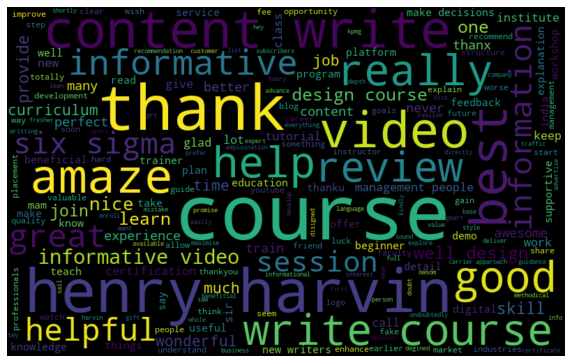

In [49]:
all_words = ' '.join([text for text in ds['CleanComment']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

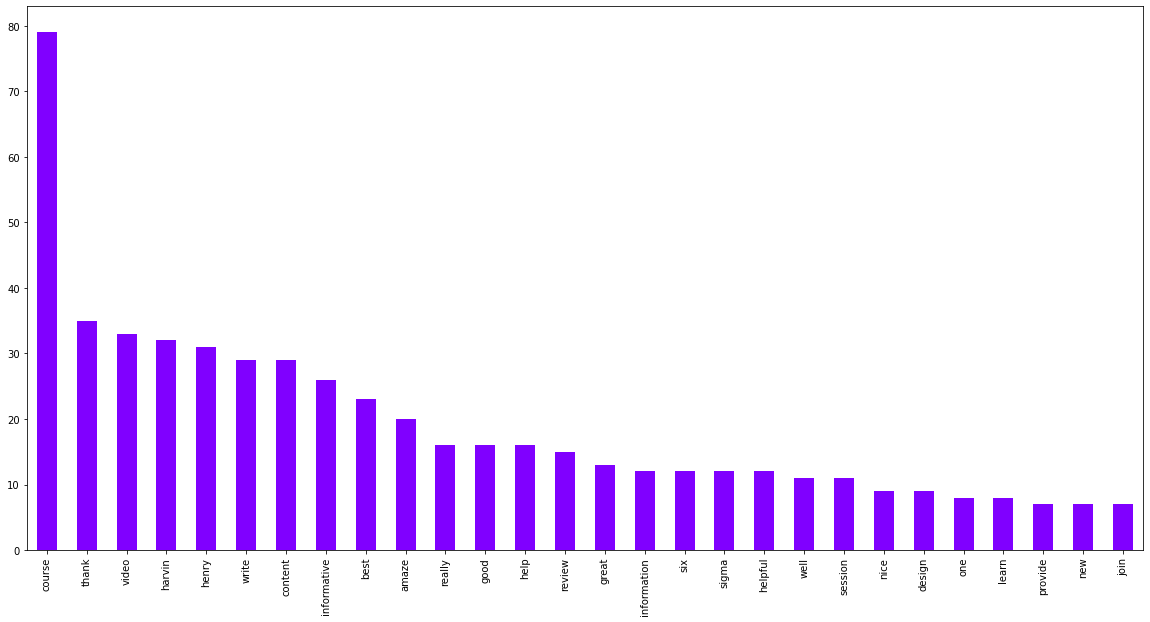

In [50]:
plt.figure(figsize=(20,10))
pd.Series (' '.join(Keywords).split()).value_counts ().head(28).plot(kind='bar',colormap= 'rainbow') 
plt.show()

In [51]:
def Word_Remove(review):
    return ' '.join([i for i in review.split() if i != 'course'])

Keywords = Keywords.apply(Word_Remove)

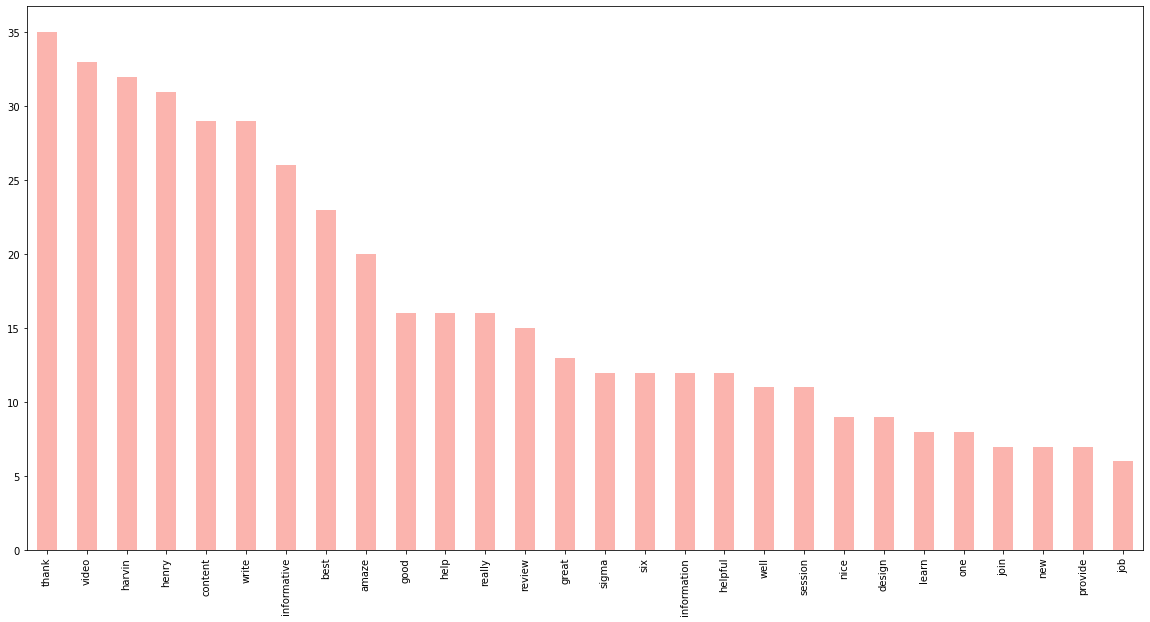

In [52]:
plt.figure(figsize=(20,10))
pd.Series (' '.join(Keywords).split()).value_counts ().head(28).plot(kind='bar',colormap= 'Pastel1') 
plt.show()

In [53]:
# Viewing most used negative words using wordcloud

In [54]:
all_words_nega = ' '.join([text for text in ds['CleanComment'][ds.Sentiment == 'Negative']])

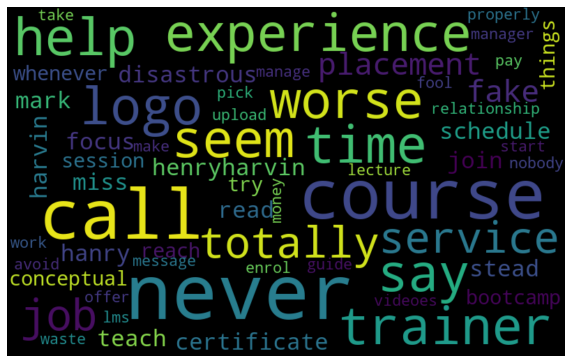

In [55]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

In [56]:
# Exporting the data to excel sheet

In [57]:
#ds.to_excel('YT_Sentiment_Analysis.xlsx')

### NOTE: The positive comments may have sarcastic positive comments, which NLP could'nt recognize!